<a href="https://colab.research.google.com/github/Yarenborta/gumushane-eem-eesec./blob/main/xor_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En başta bu kodda kullanacağımız fonksiyonları çağıracağımız kütüphaneleri dahil ediyoruz.

First we import the libraries to use the functions that we are going to invoke in this code.

In [6]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np # numerical python kütüphanesi
import pandas as pd
import sys

Bildiğimiz gibi, XOR problemi Elektrik-Elektronik Mühendisliğinde sayısal devreler (logic circuits) alanında karşımıza çıkan bir problem. İki girişli ve tek çıkışlı bir sistemin girişleri TRUE-FALSE (veya 1-0 veya HIGH-LOW) olarak isimlendirilen Boolean veri tipinde değer alıyorlar. Benzer şekilde çıkış da yine 1-0 Boolean değişkenlerinden birisi oluyor.
----------------------

Aşağıda numpy kütüphanesi kullanarak giriş ve hedef verisini (input and target data) oluşturduk. Dikkat edin, burada hedef verisine İngilizce'de annonation deniyor. Yani bizler hedef değişkenini oluşturduğumuzda giriş verisini annotate etmiş oluyoruz.

In [7]:
trainingData = np.array([[0,0], [0,1], [1,0], [1,1]], "float32") # eğitim verisi - sisteme giriş yapacak
targetData = np.array([[0], [1], [1], [0]], "float32") # hedef verisi - sistemin çıkış vermesini istediğimiz değerler

Yukarıda ürettiğimiz giriş-çıkış verisini aşağıda konsola yazdıralım.

Let's print the input-output data we generated above to the console.

In [8]:
print(trainingData)
print(targetData)

[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
[[0.]
 [1.]
 [1.]
 [0.]]



TF kütüphanesinin içerisinde yer alan Keras kütüphanesiyle bir tane çok katmanlı sinir ağı (multi-layer perceptron - MLP) oluşturalım. Giriş sayısının iki, çıkış sayısının bir olduğunu, gizli katman (hidden layer) sayısını ve bu katmanlardaki nöron sayısını ve de hangi aktivasyon fonksiyonunu kullandığımızı adım adım seçeceğiz.

In [9]:
model = tf.keras.models.Sequential(layers=None, name='xor_MLP')
model.add(tf.keras.layers.Dense(16, input_dim = 2, activation = 'relu', name='HL1'))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid', name='outputLayer'))

Yukarıdaki kodda yapay sinir ağımızın yapısını (i.e., katman sayısı, katmanlardaki nöron sayısı, nöron çıkışlarında kullanılan aktivasyon fonskiyon tipleri) belirledik. Bir sonraki adım olarak öğrenme (learning) işlemini başlatacağız. Şimdi öğrenme işleminin (learning process) nasıl olacağını ayarlayalım.

In [10]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics='binary_accuracy')
model.summary()

Model: "xor_MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
HL1 (Dense)                  (None, 16)                48        
_________________________________________________________________
outputLayer (Dense)          (None, 1)                 17        
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


Son olarak konfigürasyonunu tamamladığımız çok katmanlı yapay sinir ağının eğitimini başlatıyoruz. Burada kullanılan fonksiyonun ismi fit yani uydurma demek.

Lastly, we start training the configured MLP.

In [11]:
history=model.fit(trainingData, targetData, epochs=200, verbose=1)

Epoch 1/200
1/1 [==============================] - 1s 517ms/step - loss: 0.2746 - binary_accuracy: 0.7500
Epoch 2/200
1/1 [==============================] - 0s 7ms/step - loss: 0.2741 - binary_accuracy: 0.7500
Epoch 3/200
1/1 [==============================] - 0s 4ms/step - loss: 0.2737 - binary_accuracy: 0.7500
Epoch 4/200
1/1 [==============================] - 0s 5ms/step - loss: 0.2733 - binary_accuracy: 0.7500
Epoch 5/200
1/1 [==============================] - 0s 5ms/step - loss: 0.2729 - binary_accuracy: 0.7500
Epoch 6/200
1/1 [==============================] - 0s 5ms/step - loss: 0.2724 - binary_accuracy: 0.7500
Epoch 7/200
1/1 [==============================] - 0s 3ms/step - loss: 0.2720 - binary_accuracy: 0.7500
Epoch 8/200
1/1 [==============================] - 0s 9ms/step - loss: 0.2716 - binary_accuracy: 0.7500
Epoch 9/200
1/1 [==============================] - 0s 3ms/step - loss: 0.2712 - binary_accuracy: 0.5000
Epoch 10/200
1/1 [==============================] - 0s 3ms/ste


Eğitimi tamamlanan yapay sinir ağını şimdi test edelim. Aslında test etmeye gerek yok ama ne olduğunu anlamak için giriş verisini son halini alan çok katmanlı yapay sinir ağına verelim ve çıkışa bakalım. Burda geçen fonksiyonun ismi predict yani tahmin etme ifadesi kullanılmış

In [14]:
model.predict(trainingData).round()

array([[0.],
       [1.],
       [1.],
       [0.]], dtype=float32)

Optimizasyon problemlerinde kullanılan önemli bir terminoloji loss function. Bu fonksiyonu minimize etmeye çalışıyoruz.

Text(0.5, 1.0, 'loss fcn vs. epoch number')

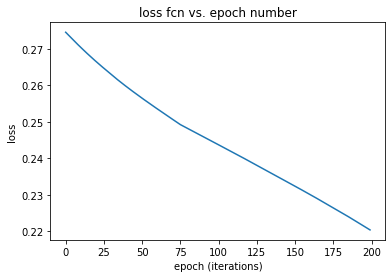

In [13]:
lossCurve = history.history["loss"]
plt.plot(lossCurve, label="Train")
# plt.legend(loc='upper right')
plt.xlabel("epoch (iterations)")
plt.ylabel("loss")
plt.title("loss fcn vs. epoch number")

Text(0.5, 1.0, 'Accuracy vs. epoch number')

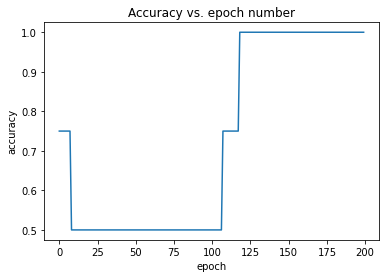

In [15]:
accuracyCurve = history.history["binary_accuracy"]
plt.plot(accuracyCurve, label="Accuracy")
# plt.legend(loc='upper left')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("Accuracy vs. epoch number")